# Statistical Learning in Epidemiology - Final Project

# Description of the dataset on the Bell's Palsy Clinical Trial.

The dataset contains the following variables:

- **Patient ID**: Patient identifier.
- **Sex**: Gender of the patient.
- **Age**: Age of the patient.
- **Baseline Score on House-Brackmann scale**: Initial score on the House-Brackmann scale, used to assess the severity of facial palsy.
- **Time between onset of symptoms and start of treatment**: Time elapsed between onset of symptoms and start of treatment.
- **Treatment Group**: Treatment group to which the patient has been assigned.
- **Received Prednisolone**: Indicates whether the patient received prednisolone.
- **Received Acyclovir**: Indicates whether the patient received acyclovir.
- **3-Month Score on House-Brackmann scale**: Score on House-Brackmann scale at 3 months.
- **Full Recovery in 3 Months**: Full recovery at 3 months.
- **9-Month Score on House-Brackmann scale**: Score on House-Brackmann scale at 9 months.
- **Full Recovery in 9 Months**: Full recovery at 9 months.


# Main question.
Is it possible to predict, based on variables collected at the start of treatment such as the patient's age, gender, initial score on the House-Brackmann scale, and the time between the onset of symptoms and the start of treatment, what the score on the House-Brackmann scale will be at 3 and 9 months, as well as the likelihood of full recovery in these time intervals?

# Study Design.

Randomized, double-blind, factorial study of patients with Bell's palsy recruited within 72 hours of symptom onset. Patients were randomly assigned to receive 10 days of treatment with prednisolone, acyclovir, both drugs or a placebo. The primary goal was recovery of facial function, assessed by the House-Brackmann scale. Secondary goals included quality of life, cosmetic appearance and pain.

# Objectives of the Analysis.

The main objective of the analysis is to develop a predictive model using initial variables such as patient age, gender, initial score on the House-Brackmann scale, and time between symptom onset and treatment initiation to predict the score on the House-Brackmann scale and the likelihood of full recovery at 3 and 9 months. This model is intended to provide useful insights for tailoring treatment strategies. Further scientific questions will investigate the relative efficacy of treatments, the impact of demographic and clinical variables on prognosis, and the progression of recovery scores over time, thus enriching the understanding of the treatment dynamics of Bell's palsy.

In [ ]:
# Importing system libraries
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# Import data management tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import MiniBatchKMeans

In [ ]:
from google.colab import files
files.upload()  # Load the kaggle.json file.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tommasomingrone","key":"45467c7e53405f377e1778ad1cde2161"}'}

In [ ]:
import zipfile

# Create the .kaggle folder and move the kaggle.json file to it
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/

# Set permissions for the kaggle.json file
os.chmod("/root/.kaggle/kaggle.json", 600)

# Download the dataset from Kaggle
!kaggle datasets download -d dillonmyrick/bells-palsy-clinical-trial

# Extract the dataset
with zipfile.ZipFile("bells-palsy-clinical-trial.zip", 'r') as zip_ref:
    zip_ref.extractall("bells-palsy-clinical-trial")

# Verify that the files have been extracted correctly
os.listdir("bells-palsy-clinical-trial")


Dataset URL: https://www.kaggle.com/datasets/dillonmyrick/bells-palsy-clinical-trial
License(s): CC0-1.0
bells-palsy-clinical-trial.zip: Skipping, found more recently modified local copy (use --force to force download)


['Bells Palsy Clinical Trial.csv']

In [ ]:
# List of extracted files
dataset_dir = "bells-palsy-clinical-trial"
for root, dirs, files in os.walk(dataset_dir):
    for name in files:
        print(os.path.join(root, name))

bells-palsy-clinical-trial/Bells Palsy Clinical Trial.csv


In [ ]:
# Load dataset into a pandas dataframe
file_path = '/content/bells-palsy-clinical-trial/Bells Palsy Clinical Trial.csv'
data = pd.read_csv(file_path)

In [ ]:
# Check and count missing values represented as '0', '-', '?', 'Unknown'
missing_values = ["0", "-", "?", "Unknown"]

# Checks each column for missing values
missing_counts = {}
for col in data.columns:
    missing_counts[col] = data[col].isin(missing_values).sum()

# View counts of missing values for each column
for col, count in missing_counts.items():
    print(f"Numero di valori mancanti in {col}: {count}")

# Replace missing values with NaN and remove rows with missing values
data.replace(missing_values, np.nan, inplace=True)
data.dropna(inplace=True)

Numero di valori mancanti in Patient ID: 0
Numero di valori mancanti in Sex: 0
Numero di valori mancanti in Age: 0
Numero di valori mancanti in Baseline Score on House–Brackmann scale: 0
Numero di valori mancanti in Time between onset of symptoms and start of treatment: 1
Numero di valori mancanti in Treatment Group: 0
Numero di valori mancanti in Received Prednisolone: 0
Numero di valori mancanti in Received Acyclovir: 0
Numero di valori mancanti in 3-Month Score on House–Brackmann scale: 0
Numero di valori mancanti in Full Recovery in 3 Months: 0
Numero di valori mancanti in 9-Month Score on House–Brackmann scale: 0
Numero di valori mancanti in Full Recovery in 9 Months: 0


In [ ]:
# General configurations for plots
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Count the total number of patients
total_patients = len(data)
print(f"Numero totale di pazienti: {total_patients}")

Numero totale di pazienti: 493


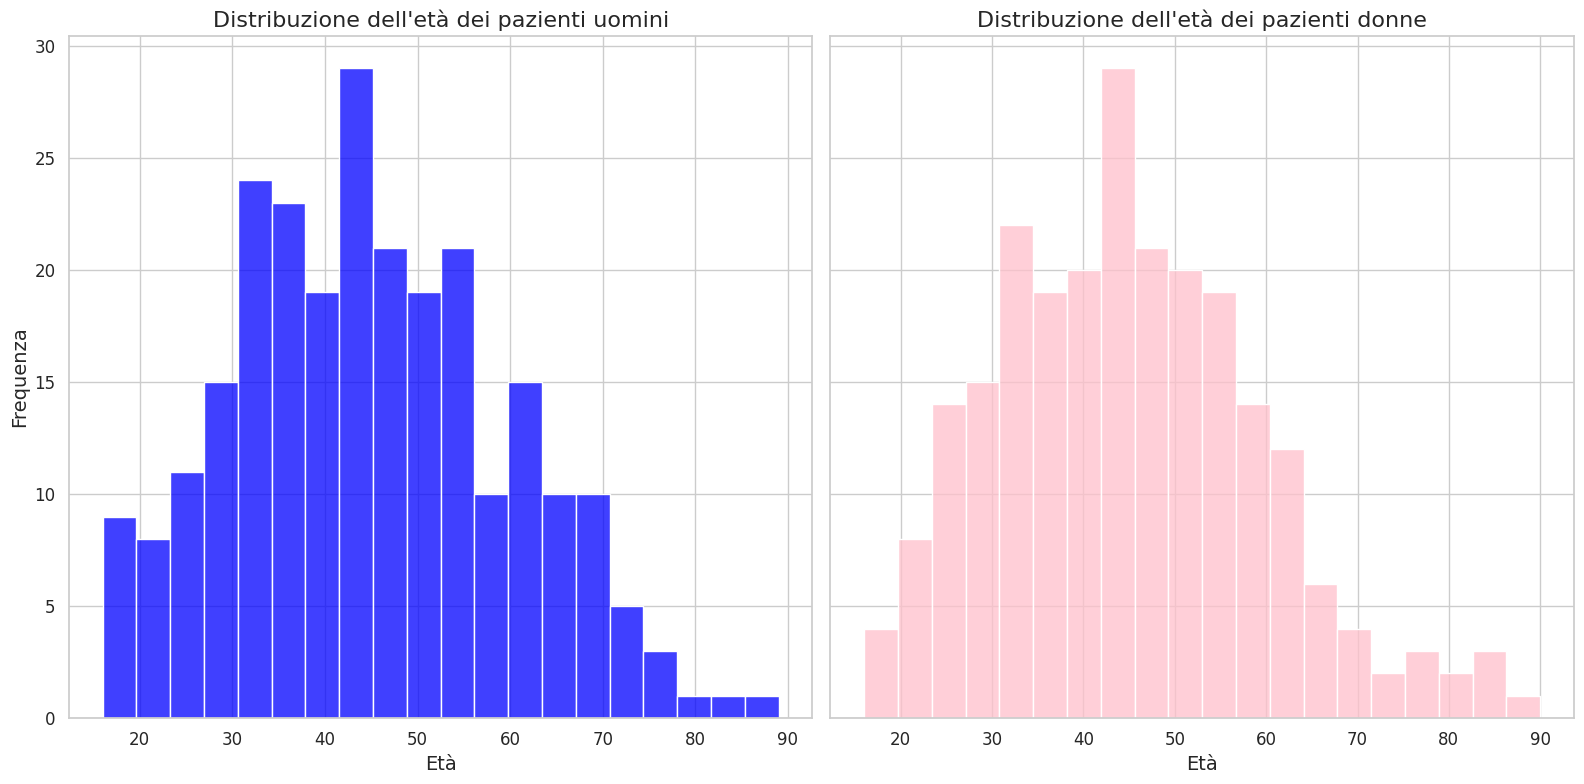

In [ ]:
# Definition of colors for the sexes
palette = {'Male': 'blue', 'Female': 'pink'}

# Creating barplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Barplot for men
sns.histplot(data=data[data['Sex'] == 'Male'], x='Age', bins=20, kde=False, color='blue', ax=axs[0])
axs[0].set_title('Distribuzione dell\'età dei pazienti uomini', fontsize=16)
axs[0].set_xlabel('Età', fontsize=14)
axs[0].set_ylabel('Frequenza', fontsize=14)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)

# Barplot for women
sns.histplot(data=data[data['Sex'] == 'Female'], x='Age', bins=20, kde=False, color='pink', ax=axs[1])
axs[1].set_title('Distribuzione dell\'età dei pazienti donne', fontsize=16)
axs[1].set_xlabel('Età', fontsize=14)
axs[1].set_ylabel('Frequenza', fontsize=14)
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the average age for each sex
mean_age_male = data[data['Sex'] == 'Male']['Age'].mean()
mean_age_female = data[data['Sex'] == 'Female']['Age'].mean()

print(f"Età media degli uomini: {mean_age_male:.2f} anni")
print(f"Età media delle donne: {mean_age_female:.2f} anni")

Età media degli uomini: 44.77 anni
Età media delle donne: 44.96 anni


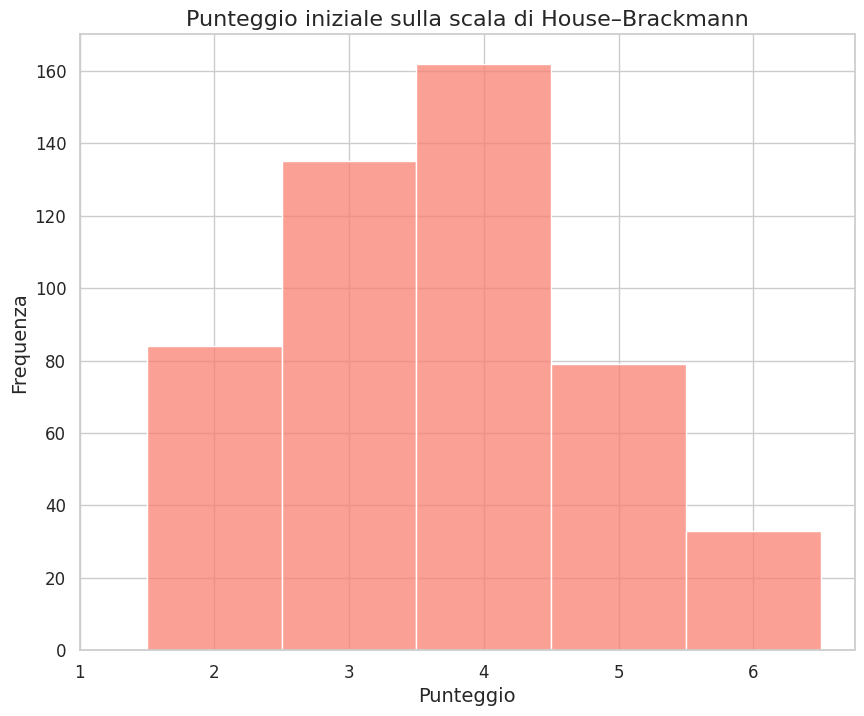

In [ ]:
# Plotting the distribution of baseline House-Brackmann scores
plt.figure(figsize=(10, 8))
sns.histplot(data['Baseline Score on House–Brackmann scale'], bins=range(1, 8), kde=False, color='salmon', discrete=True)
plt.title('Punteggio iniziale sulla scala di House–Brackmann', fontsize=16)
plt.xlabel('Punteggio', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)
plt.xticks(range(1, 7), fontsize=12)
plt.yticks(fontsize=12)
plt.show()


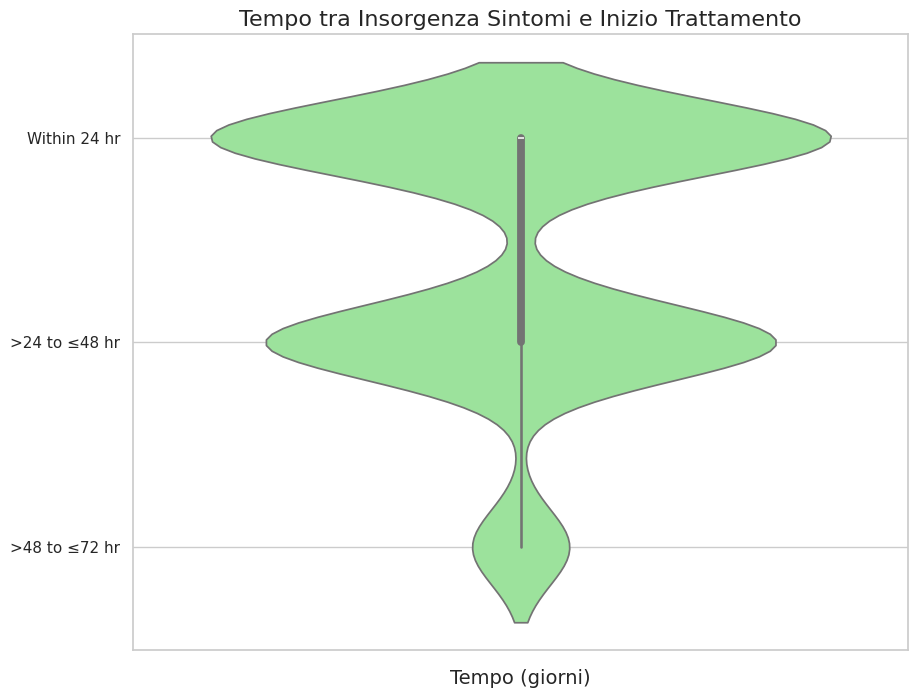

In [ ]:
# Tracking configurations
sns.set(style="whitegrid")

# Violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(y=data['Time between onset of symptoms and start of treatment'], color='lightgreen')
plt.title('Tempo tra Insorgenza Sintomi e Inizio Trattamento', fontsize=16)
plt.xlabel('Tempo (giorni)', fontsize=14)
plt.ylabel('')
plt.show()

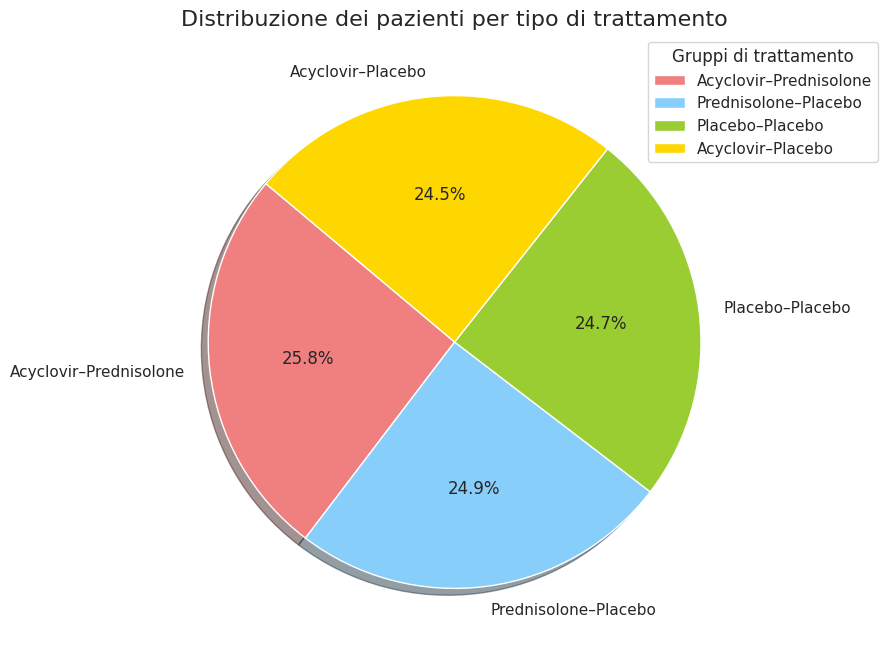

In [ ]:
# Count the number of patients for each type of treatment
treatment_counts = data['Treatment Group'].value_counts()

# Data for the pie chart
labels = treatment_counts.index
sizes = treatment_counts.values
colors = ['lightcoral', 'lightskyblue', 'yellowgreen', 'gold']
explode = (0, 0, 0, 0)  

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribuzione dei pazienti per tipo di trattamento', fontsize=16)

# Add the legend in the upper right corner
plt.legend(labels, title="Gruppi di trattamento", loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()

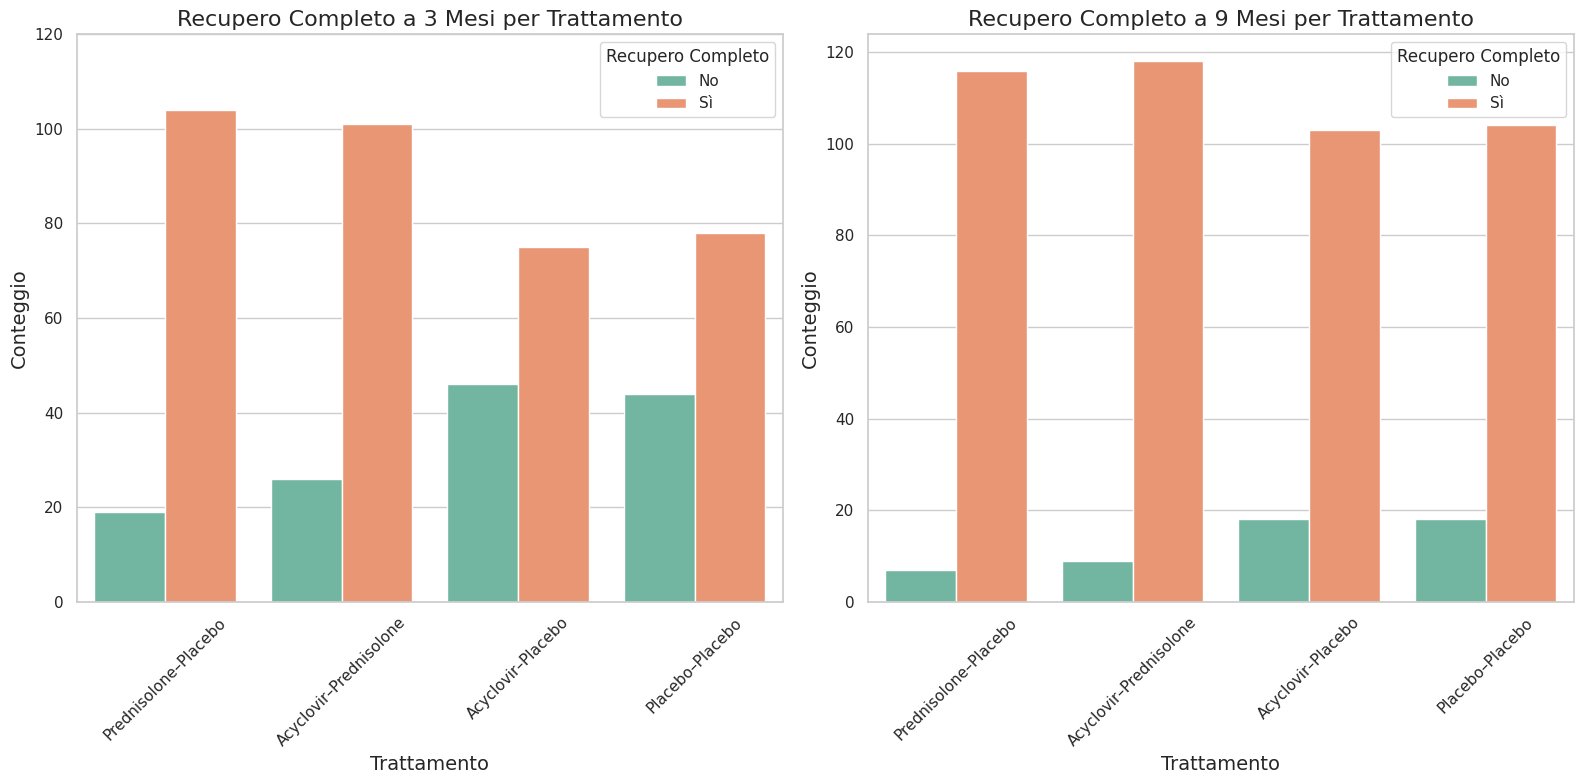

In [ ]:
# Create a figure with two subplots for count plots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Count plot for full recovery at 3 months per treatment
sns.countplot(x='Treatment Group', hue='Full Recovery in 3 Months', data=data, palette='Set2', ax=axs[0])
axs[0].set_title('Recupero Completo a 3 Mesi per Trattamento', fontsize=16)
axs[0].set_xlabel('Trattamento', fontsize=14)
axs[0].set_ylabel('Conteggio', fontsize=14)
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend(title='Recupero Completo', labels=['No', 'Sì'], loc='upper right')
axs[0].set_ylim(0, 120)  # Set the limit of the y-axis

# Count plot for full recovery at 9 months per treatment
sns.countplot(x='Treatment Group', hue='Full Recovery in 9 Months', data=data, palette='Set2', ax=axs[1])
axs[1].set_title('Recupero Completo a 9 Mesi per Trattamento', fontsize=16)
axs[1].set_xlabel('Trattamento', fontsize=14)
axs[1].set_ylabel('Conteggio', fontsize=14)
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(title='Recupero Completo', labels=['No', 'Sì'], loc='upper right')

plt.tight_layout()
plt.show()


## Hypothesis testing

### Hypothesis Test for Prednisolone vs. Placebo

**Hypothesis:**
- **H<sub>0:** The 'efficacy of Prednisolone is greater than placebo.
- **H<sub>1:** Prednisolone 's efficacy is less than or equal to placebo.

### Hypothesis Test for Acyclovir vs. Placebo

**Hypothesis:**
- **H<sub>0**: The 'efficacy of Acyclovir is greater than placebo.
- **H<sub>1**: The 'efficacy of Acyclovir is less than or equal to placebo.

### Hypothesis test for Prednisolone+Acyclovir vs. Prednisolone

**Hypothesis:**
- **H<sub>0**: The 'efficacy of combined prednisolone-acyclovir is greater than prednisolone alone.
- **H<sub>1**: The 'efficacy of combined prednisolone-acyclovir is less than or equal to prednisolone alone.



In [ ]:
import pandas as pd
from scipy.stats import fisher_exact

# Conversion of score columns to integers
data['3-Month Score on House–Brackmann scale'] = data['3-Month Score on House–Brackmann scale'].astype(int)
data['9-Month Score on House–Brackmann scale'] = data['9-Month Score on House–Brackmann scale'].astype(int)

# Extraction of groups based on the “Treatment Group” column
placebo_group_3m = data[data['Treatment Group'] == 'Placebo–Placebo']['3-Month Score on House–Brackmann scale']
prednisolone_group_3m = data[data['Treatment Group'] == 'Prednisolone–Placebo']['3-Month Score on House–Brackmann scale']
acyclovir_group_3m = data[data['Treatment Group'] == 'Acyclovir–Placebo']['3-Month Score on House–Brackmann scale']

placebo_group_9m = data[data['Treatment Group'] == 'Placebo–Placebo']['9-Month Score on House–Brackmann scale']
prednisolone_group_9m = data[data['Treatment Group'] == 'Prednisolone–Placebo']['9-Month Score on House–Brackmann scale']
acyclovir_group_9m = data[data['Treatment Group'] == 'Acyclovir–Placebo']['9-Month Score on House–Brackmann scale']

# Deleting missing values
placebo_group_3m = placebo_group_3m.dropna()
prednisolone_group_3m = prednisolone_group_3m.dropna()
acyclovir_group_3m = acyclovir_group_3m.dropna()

placebo_group_9m = placebo_group_9m.dropna()
prednisolone_group_9m = prednisolone_group_9m.dropna()
acyclovir_group_9m = acyclovir_group_9m.dropna()

# Calculating contingency tables for recovery scores (consider 2 or less as full recovery)
contingency_table_pred_3m = [
    [(prednisolone_group_3m <= 2).sum(), (prednisolone_group_3m > 2).sum()],
    [(placebo_group_3m <= 2).sum(), (placebo_group_3m > 2).sum()]
]

contingency_table_acy_3m = [
    [(acyclovir_group_3m <= 2).sum(), (acyclovir_group_3m > 2).sum()],
    [(placebo_group_3m <= 2).sum(), (placebo_group_3m > 2).sum()]
]

contingency_table_pred_9m = [
    [(prednisolone_group_9m <= 2).sum(), (prednisolone_group_9m > 2).sum()],
    [(placebo_group_9m <= 2).sum(), (placebo_group_9m > 2).sum()]
]

contingency_table_acy_9m = [
    [(acyclovir_group_9m <= 2).sum(), (acyclovir_group_9m > 2).sum()],
    [(placebo_group_9m <= 2).sum(), (placebo_group_9m > 2).sum()]
]

# Performing Fisher's exact test
fisher_pred_3m, p_val_fisher_pred_3m = fisher_exact(contingency_table_pred_3m, alternative='less')
fisher_acy_3m, p_val_fisher_acy_3m = fisher_exact(contingency_table_acy_3m, alternative='less')

fisher_pred_9m, p_val_fisher_pred_9m = fisher_exact(contingency_table_pred_9m, alternative='less')
fisher_acy_9m, p_val_fisher_acy_9m = fisher_exact(contingency_table_acy_9m, alternative='less')

# Level of significance
alpha = 0.05

# Print results for 3 months
print(f'Prednisolone vs Placebo (3 Months) - Fisher\'s Exact Test: p-value = {p_val_fisher_pred_3m:.3f}')
if p_val_fisher_pred_3m <= alpha:
    print("Reject the null hypothesis: L'efficacia del Prednisolone non è significativamente maggiore del placebo a 3 mesi.")
else:
    print("Accept the null hypothesia : L'efficacia del Prednisolone è significativamente maggiore del placebo a 3 mesi.")

print(f'Acyclovir vs Placebo (3 Months) - Fisher\'s Exact Test: p-value = {p_val_fisher_acy_3m:.3f}')
if p_val_fisher_acy_3m <= alpha:
    print("Reject the null hypothesis: L'efficacia dell'Acyclovir non è significativamente maggiore del placebo a 3 mesi.")
else:
    print(" Accept the null hypothesis: L'efficacia dell'Acyclovir è significativamente maggiore del placebo a 3 mesi.")

# Print results for 9 months
print(f'Prednisolone vs Placebo (9 Months) - Fisher\'s Exact Test: p-value = {p_val_fisher_pred_9m:.3f}')
if p_val_fisher_pred_9m <= alpha:
    print("Reject the null hypothesis: L'efficacia del Prednisolone non è significativamente maggiore del placebo a 9 mesi.")
else:
    print("Accept the null hypothesis: L'efficacia del Prednisolone è significativamente maggiore del placebo a 9 mesi.")

print(f'Acyclovir vs Placebo (9 Months) - Fisher\'s Exact Test: p-value = {p_val_fisher_acy_9m:.3f}')
if p_val_fisher_acy_9m <= alpha:
    print("Reject the null hypothesis: L'efficacia dell'Acyclovir non è significativamente maggiore del placebo a 9 mesi.")
else:
    print("Accept the null hypothesis: L'efficacia dell'Acyclovir è significativamente maggiore del placebo a 9 mesi.")



Prednisolone vs Placebo (3 Months) - Fisher's Exact Test: p-value = 0.999
Accept the null hypothesia : L'efficacia del Prednisolone è significativamente maggiore del placebo a 3 mesi.
Acyclovir vs Placebo (3 Months) - Fisher's Exact Test: p-value = 0.814
 Accept the null hypothesis: L'efficacia dell'Acyclovir è significativamente maggiore del placebo a 3 mesi.
Prednisolone vs Placebo (9 Months) - Fisher's Exact Test: p-value = 0.993
Accept the null hypothesis: L'efficacia del Prednisolone è significativamente maggiore del placebo a 9 mesi.
Acyclovir vs Placebo (9 Months) - Fisher's Exact Test: p-value = 0.726
Accept the null hypothesis: L'efficacia dell'Acyclovir è significativamente maggiore del placebo a 9 mesi.


In [ ]:
# Creating the tables with the results
results_3m = pd.DataFrame({
    'Comparison': ['Prednisolone vs Placebo (3 Months)', 'Acyclovir vs Placebo (3 Months)'],
    'P-value': [p_val_fisher_pred_3m, p_val_fisher_acy_3m],
    'Significant': ['Reject' if p_val <= alpha else 'Fail to reject' for p_val in [p_val_fisher_pred_3m, p_val_fisher_acy_3m]]
})

results_9m = pd.DataFrame({
    'Comparison': ['Prednisolone vs Placebo (9 Months)', 'Acyclovir vs Placebo (9 Months)'],
    'P-value': [p_val_fisher_pred_9m, p_val_fisher_acy_9m],
    'Significant': ['Reject' if p_val <= alpha else 'Fail to reject' for p_val in [p_val_fisher_pred_9m, p_val_fisher_acy_9m]]
})

print("3-Month Results:")
print(results_3m)
print("\n9-Month Results:")
print(results_9m)

3-Month Results:
                           Comparison   P-value     Significant
0  Prednisolone vs Placebo (3 Months)  0.999349  Fail to reject
1     Acyclovir vs Placebo (3 Months)  0.813969  Fail to reject

9-Month Results:
                           Comparison   P-value     Significant
0  Prednisolone vs Placebo (9 Months)  0.993053  Fail to reject
1     Acyclovir vs Placebo (9 Months)  0.725646  Fail to reject


In [ ]:
import pandas as pd
from scipy.stats import fisher_exact

# Assume that 'data' is already a pandas DataFrame with the correct data

# Conversion of score columns to integers
data['3-Month Score on House–Brackmann scale'] = data['3-Month Score on House–Brackmann scale'].astype(int)
data['9-Month Score on House–Brackmann scale'] = data['9-Month Score on House–Brackmann scale'].astype(int)

# Extraction of groups based on the “Treatment Group” column
acy_pred_group_3m = data[data['Treatment Group'] == 'Acyclovir–Prednisolone']['3-Month Score on House–Brackmann scale']
pred_placebo_group_3m = data[data['Treatment Group'] == 'Prednisolone–Placebo']['3-Month Score on House–Brackmann scale']

acy_pred_group_9m = data[data['Treatment Group'] == 'Acyclovir–Prednisolone']['9-Month Score on House–Brackmann scale']
pred_placebo_group_9m = data[data['Treatment Group'] == 'Prednisolone–Placebo']['9-Month Score on House–Brackmann scale']

# Calculating contingency tables for recovery scores (consider 2 or less as full recovery)
contingency_table_acy_pred_3m = [
    [(acy_pred_group_3m <= 2).sum(), (acy_pred_group_3m > 2).sum()],
    [(pred_placebo_group_3m <= 2).sum(), (pred_placebo_group_3m > 2).sum()]
]

contingency_table_acy_pred_9m = [
    [(acy_pred_group_9m <= 2).sum(), (acy_pred_group_9m > 2).sum()],
    [(pred_placebo_group_9m <= 2).sum(), (pred_placebo_group_9m > 2).sum()]
]

# Printing contingency tables for verification
print("Contingency Table (3 Months):", contingency_table_acy_pred_3m)
print("Contingency Table (9 Months):", contingency_table_acy_pred_9m)

# Performing Fisher's exact test
fisher_acy_pred_3m, p_val_fisher_acy_pred_3m = fisher_exact(contingency_table_acy_pred_3m, alternative='greater')
fisher_acy_pred_9m, p_val_fisher_acy_pred_9m = fisher_exact(contingency_table_acy_pred_9m, alternative='greater')

# Level of significance
alpha = 0.05

# Print results for 3 months
print(f'Acyclovir-Prednisolone vs Prednisolone-Placebo (3 Months) - Fisher\'s Exact Test: p-value = {p_val_fisher_acy_pred_3m:.3f}')
if p_val_fisher_acy_pred_3m < alpha:
    print("Reject the null hypothesis: L'efficacia dell'Acyclovir-Prednisolone è significativamente maggiore del Prednisolone-Placebo a 3 mesi.")
else:
    print("Accept the null hypothesis: L'efficacia dell'Acyclovir-Prednisolone è significativamente minore o uguale del Prednisolone-Placebo a 3 mesi.")

# Print results for 9 months
print(f'Acyclovir-Prednisolone vs Prednisolone-Placebo (9 Months) - Fisher\'s Exact Test: p-value = {p_val_fisher_acy_pred_9m:.3f}')
if p_val_fisher_acy_pred_9m < alpha:
    print("Reject the null hypothesis: L'efficacia dell'Acyclovir-Prednisolone è significativamente maggiore del Prednisolone-Placebo a 9 mesi.")
else:
    print("Accept the null hypothesis: L'efficacia dell'Acyclovir-Prednisolone è significativamente minore o uguale del Prednisolone-Placebo a 9 mesi.")


Contingency Table (3 Months): [[122, 5], [121, 2]]
Contingency Table (9 Months): [[125, 2], [122, 1]]
Acyclovir-Prednisolone vs Prednisolone-Placebo (3 Months) - Fisher's Exact Test: p-value = 0.935
Accept the null hypothesis: L'efficacia dell'Acyclovir-Prednisolone è significativamente minore o uguale del Prednisolone-Placebo a 3 mesi.
Acyclovir-Prednisolone vs Prednisolone-Placebo (9 Months) - Fisher's Exact Test: p-value = 0.870
Accept the null hypothesis: L'efficacia dell'Acyclovir-Prednisolone è significativamente minore o uguale del Prednisolone-Placebo a 9 mesi.


### Hypothesis Test for Prednisolone+Acyclovir vs. Prednisolone
- **H<sub>0**: The 'efficacy of combined prednisolone-acyclovir is less than or equal to prednisolone alone
- **H<sub>1**: The 'efficacy of combined prednisolone-acyclovir is greater than prednisolone alone



In [ ]:
# Creating the tables with the results
results_3m = pd.DataFrame({
    'Comparison': ['Prednisolone-Acyclovir vs Prednisolone-Placebo (3 Months)'],
    'P-value': [p_val_fisher_acy_pred_3m],
    'Significant': ['Reject' if p_val <= alpha else 'Fail to reject' for p_val in [p_val_fisher_acy_pred_3m]]
})

results_9m = pd.DataFrame({
    'Comparison': ['Prednisolone-Acyclovir vs Prednisolone-Placebo (9 Months)'],
    'P-value': [p_val_fisher_acy_pred_9m],
    'Significant': ['Reject' if p_val <= alpha else 'Fail to reject' for p_val in [p_val_fisher_acy_pred_9m]]
})

print("3-Month Results:")
print(results_3m)
print("\n9-Month Results:")
print(results_9m)

3-Month Results:
                                          Comparison   P-value     Significant
0  Prednisolone-Acyclovir vs Prednisolone-Placebo...  0.934822  Fail to reject

9-Month Results:
                                          Comparison   P-value     Significant
0  Prednisolone-Acyclovir vs Prednisolone-Placebo...  0.870433  Fail to reject


In [ ]:
import pandas as pd


# Correcting column names to eliminate spaces
data.columns = [col.strip() for col in data.columns]

# Mapping treatment groups into names
treatment_mapping = {
    3: 'Prednisolone–Placebo',
    1: 'Acyclovir–Placebo',
    0: 'Acyclovir–Prednisolone',
    2: 'Placebo–Placebo'
}
data['Treatment Group Name'] = data['Treatment Group'].map(treatment_mapping)

# Calculation of average scores at 3 months and 9 months for each treatment group
mean_scores_3m = data.groupby('Treatment Group Name')['3-Month Score on House–Brackmann scale'].mean()
mean_scores_9m = data.groupby('Treatment Group Name')['9-Month Score on House–Brackmann scale'].mean()

# Creating the DataFrame with averages
mean_scores = pd.DataFrame({
    'Punteggio a 3 mesi': mean_scores_3m,
    'Punteggio a 9 mesi': mean_scores_9m
})

print(mean_scores)


                        Punteggio a 3 mesi  Punteggio a 9 mesi
Treatment Group Name                                          
Acyclovir–Placebo                 1.244094            1.086614
Acyclovir–Prednisolone            1.471074            1.206612
Placebo–Placebo                   1.475410            1.213115
Prednisolone–Placebo              1.170732            1.065041


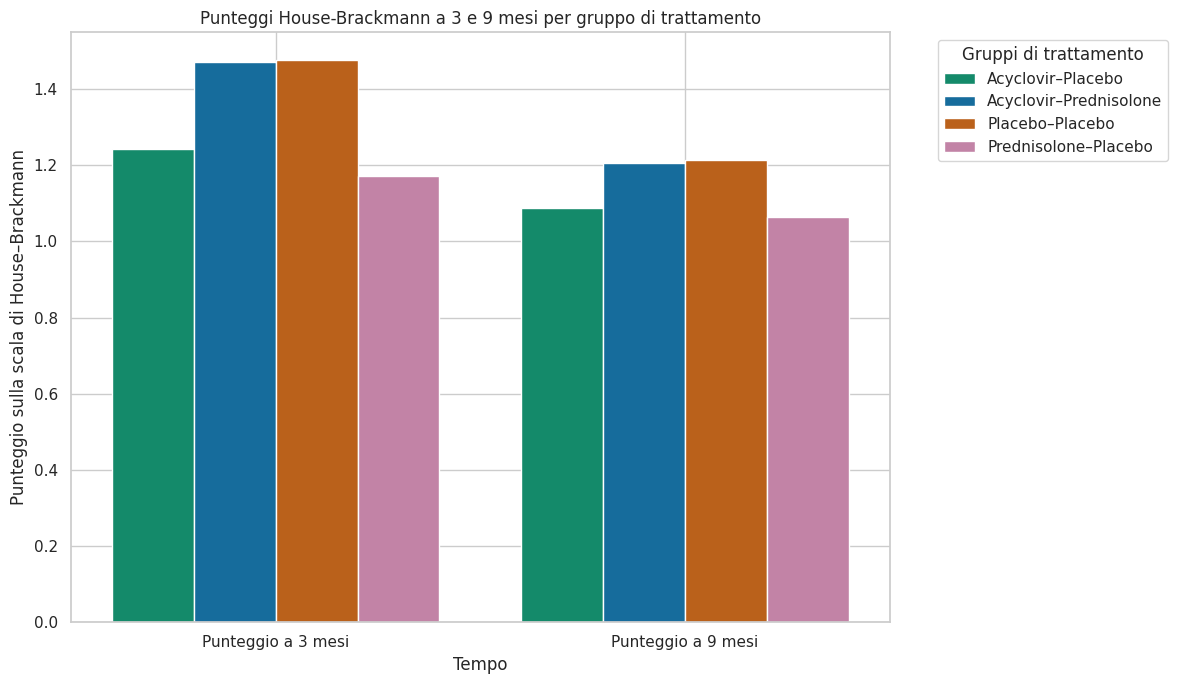

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Mapping treatment groups into names
treatment_mapping = {
    3: 'Prednisolone–Placebo',
    1: 'Acyclovir–Placebo',
    0: 'Acyclovir–Prednisolone',
    2: 'Placebo–Placebo'
}
data['Treatment Group Name'] = data['Treatment Group'].map(treatment_mapping)

# Calculation of average scores at 3 months and 9 months for each treatment group
mean_scores_3m = data.groupby('Treatment Group Name')['3-Month Score on House–Brackmann scale'].mean()
mean_scores_9m = data.groupby('Treatment Group Name')['9-Month Score on House–Brackmann scale'].mean()

# Creating the DataFrame with averages
mean_scores = pd.DataFrame({
    'Punteggio a 3 mesi': mean_scores_3m,
    'Punteggio a 9 mesi': mean_scores_9m
})

# Creating the DataFrame with long format averages
mean_scores_long = mean_scores.reset_index().melt(id_vars='Treatment Group Name',
                                                  value_vars=['Punteggio a 3 mesi', 'Punteggio a 9 mesi'],
                                                  var_name='Time', value_name='Score')

# Defining distinct colors for each treatment group
palette = sns.color_palette(['#009E73', '#0072B2', '#D55E00', '#CC79A7'])

# Creating the stacked bar graph
plt.figure(figsize=(12, 7))
barplot = sns.barplot(x='Time', y='Score', hue='Treatment Group Name', data=mean_scores_long, dodge=True, palette=palette)

plt.title('Punteggi House-Brackmann a 3 e 9 mesi per gruppo di trattamento')
plt.xlabel('Tempo')
plt.ylabel('Punteggio sulla scala di House–Brackmann')

# Position the legend off the plot to the right
plt.legend(title='Gruppi di trattamento', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
data = data.drop(columns=['Treatment Group Name'])

## Analisi multivariata

* ODDS RATIO

Full Recovery in 3 Months  No  Yes
Received Prednisolone             
No                         90  153
Yes                        45  205
Full Recovery in 9 Months  No  Yes
Received Prednisolone             
No                         36  207
Yes                        16  234
Full Recovery in 3 Months  No  Yes
Received Acyclovir                
No                         63  182
Yes                        72  176
Full Recovery in 9 Months  No  Yes
Received Acyclovir                
No                         25  220
Yes                        27  221
Full Recovery in 3 Months                           No  Yes
Time between onset of symptoms and start of tre...         
>24 to ≤48 hr                                       60  145
>48 to ≤72 hr                                        9   30
Within 24 hr                                        66  183
Full Recovery in 9 Months                           No  Yes
Time between onset of symptoms and start of tre...         
>24 to ≤48 hr       

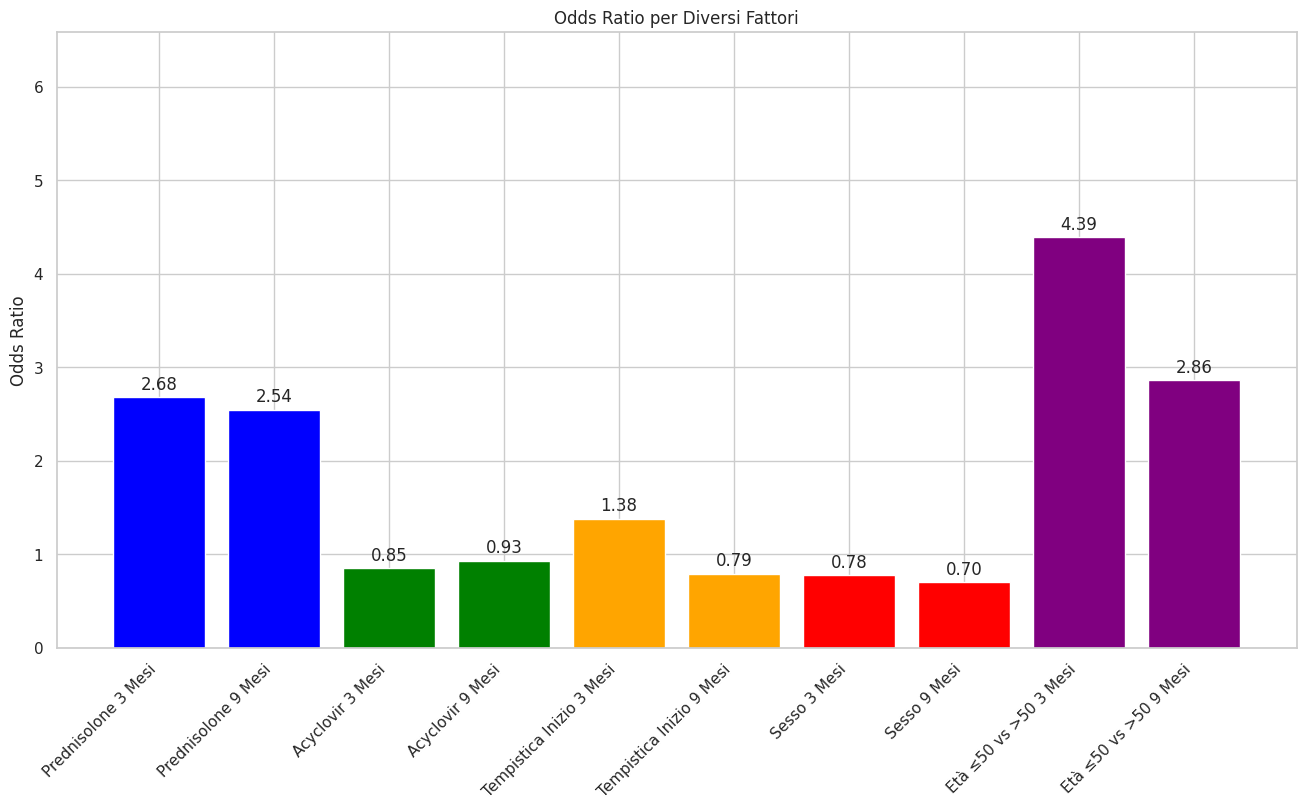

{'Prednisolone 3 Mesi': 2.679738562091503,
 'Prednisolone 9 Mesi': 2.5434782608695654,
 'Acyclovir 3 Mesi': 0.8461538461538461,
 'Acyclovir 9 Mesi': 0.9301346801346801,
 'Tempistica Inizio 3 Mesi': 1.3793103448275863,
 'Tempistica Inizio 9 Mesi': 0.7912234042553191,
 'Sesso 3 Mesi': 0.7763157894736842,
 'Sesso 9 Mesi': 0.6992715920915713,
 'Età ≤50 vs >50 3 Mesi': 4.39344262295082,
 'Età ≤50 vs >50 9 Mesi': 2.8579710144927537}

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate odds ratio with control by division by zero
def calculate_odds_ratio(contingency_table):
    print(contingency_table)
    try:
        # Identifies correct labels for rows and columns
        row_labels = contingency_table.index.tolist()
        col_labels = contingency_table.columns.tolist()

        odds_ratio = (contingency_table.loc[row_labels[0], col_labels[0]] * contingency_table.loc[row_labels[1], col_labels[1]]) / \
                     (contingency_table.loc[row_labels[0], col_labels[1]] * contingency_table.loc[row_labels[1], col_labels[0]])
    except ZeroDivisionError:
        odds_ratio = float('inf')  # Set to infinity if there is division by zero.
    return odds_ratio

# Prednisolone treatment efficacy at 3 and 9 months
contingency_table_prednisolone_3m = pd.crosstab(data['Received Prednisolone'], data['Full Recovery in 3 Months'])
contingency_table_prednisolone_9m = pd.crosstab(data['Received Prednisolone'], data['Full Recovery in 9 Months'])
or_prednisolone_3m = calculate_odds_ratio(contingency_table_prednisolone_3m)
or_prednisolone_9m = calculate_odds_ratio(contingency_table_prednisolone_9m)

# Efficacy of treatment with Acyclovir at 3 and 9 months
contingency_table_acyclovir_3m = pd.crosstab(data['Received Acyclovir'], data['Full Recovery in 3 Months'])
contingency_table_acyclovir_9m = pd.crosstab(data['Received Acyclovir'], data['Full Recovery in 9 Months'])
or_acyclovir_3m = calculate_odds_ratio(contingency_table_acyclovir_3m)
or_acyclovir_9m = calculate_odds_ratio(contingency_table_acyclovir_9m)

# Treatment start times at 3 and 9 months
contingency_table_time_3m = pd.crosstab(data['Time between onset of symptoms and start of treatment'], data['Full Recovery in 3 Months'])
contingency_table_time_9m = pd.crosstab(data['Time between onset of symptoms and start of treatment'], data['Full Recovery in 9 Months'])
or_time_3m = calculate_odds_ratio(contingency_table_time_3m)
or_time_9m = calculate_odds_ratio(contingency_table_time_9m)

# Demographic factors (e.g., gender) at 3 and 9 months
contingency_table_sex_3m = pd.crosstab(data['Sex'], data['Full Recovery in 3 Months'])
contingency_table_sex_9m = pd.crosstab(data['Sex'], data['Full Recovery in 9 Months'])
or_sex_3m = calculate_odds_ratio(contingency_table_sex_3m)
or_sex_9m = calculate_odds_ratio(contingency_table_sex_9m)

# Age (≤50 vs >50) at 3 and 9 months
data['Age Group'] = pd.cut(data['Age'], bins=[0, 50, 100], labels=['≤50', '>50'])
contingency_table_age_3m = pd.crosstab(data['Age Group'], data['Full Recovery in 3 Months'])
contingency_table_age_9m = pd.crosstab(data['Age Group'], data['Full Recovery in 9 Months'])
or_age_3m = (contingency_table_age_3m.loc['≤50', 'Yes'] * contingency_table_age_3m.loc['>50', 'Yes']) / \
            (contingency_table_age_3m.loc['≤50', 'No'] * contingency_table_age_3m.loc['>50', 'Yes'])
or_age_9m = (contingency_table_age_9m.loc['≤50', 'Yes'] * contingency_table_age_9m.loc['>50', 'No']) / \
            (contingency_table_age_9m.loc['≤50', 'No'] * contingency_table_age_9m.loc['>50', 'Yes'])

# Graph creation
odds_ratios = {
    'Prednisolone 3 Mesi': or_prednisolone_3m,
    'Prednisolone 9 Mesi': or_prednisolone_9m,
    'Acyclovir 3 Mesi': or_acyclovir_3m,
    'Acyclovir 9 Mesi': or_acyclovir_9m,
    'Tempistica Inizio 3 Mesi': or_time_3m,
    'Tempistica Inizio 9 Mesi': or_time_9m,
    'Sesso 3 Mesi': or_sex_3m,
    'Sesso 9 Mesi': or_sex_9m,
    'Età ≤50 vs >50 3 Mesi': or_age_3m,
    'Età ≤50 vs >50 9 Mesi': or_age_9m
}

fig, ax = plt.subplots(figsize=(16, 8))
bars = ax.bar(odds_ratios.keys(), odds_ratios.values(), color=['blue', 'blue', 'green', 'green', 'orange', 'orange', 'red', 'red', 'purple', 'purple'])

# Set the x-axis labels at an angle
plt.xticks(rotation=45, ha='right')

# Add titles and labels
ax.set_title('Odds Ratio per Diversi Fattori')
ax.set_ylabel('Odds Ratio')
ax.set_ylim(0, max(odds_ratios.values()) * 1.5)

# Add value labels above the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()

# Return of calculated odds ratios
odds_ratios




In [ ]:
data.drop(columns=['Age Group'], inplace=True)

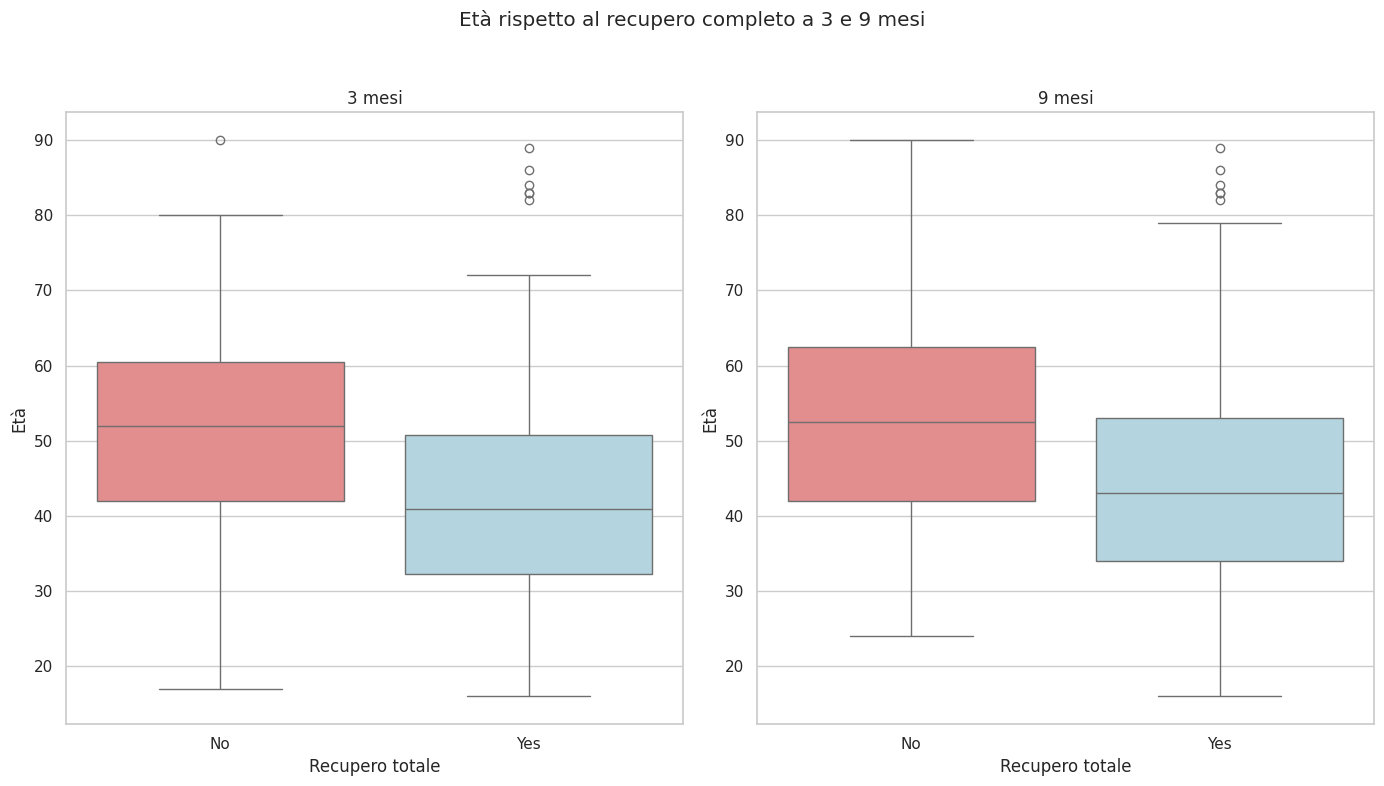

In [ ]:
data_3_months = data[['Age', 'Full Recovery in 3 Months']].rename(columns={'Full Recovery in 3 Months': 'Full Recovery'}).copy()
data_3_months['Time Period'] = '3 Months'

data_9_months = data[['Age', 'Full Recovery in 9 Months']].rename(columns={'Full Recovery in 9 Months': 'Full Recovery'}).copy()
data_9_months['Time Period'] = '9 Months'

combined_data = pd.concat([data_3_months, data_9_months], ignore_index=True)

combined_data['Full Recovery'] = combined_data['Full Recovery'].map({0: 'No', 1: 'Yes', 'No': 'No', 'Yes': 'Yes'})

colors = ['lightcoral', 'lightblue']

plt.figure(figsize=(14, 8))


# Plot 3 months
plt.subplot(1, 2, 1)
sns.boxplot(x='Full Recovery', y='Age', hue='Full Recovery', data=combined_data[combined_data['Time Period'] == '3 Months'], palette=colors, dodge=False)
plt.title('3 mesi')
plt.xlabel('Recupero totale')
plt.ylabel('Età')

# Plot 9 months
plt.subplot(1, 2, 2)
sns.boxplot(x='Full Recovery', y='Age', hue='Full Recovery', data=combined_data[combined_data['Time Period'] == '9 Months'], palette=colors, dodge=False)
plt.title('9 mesi')
plt.xlabel('Recupero totale')
plt.ylabel('Età')

plt.suptitle('Età rispetto al recupero completo a 3 e 9 mesi')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


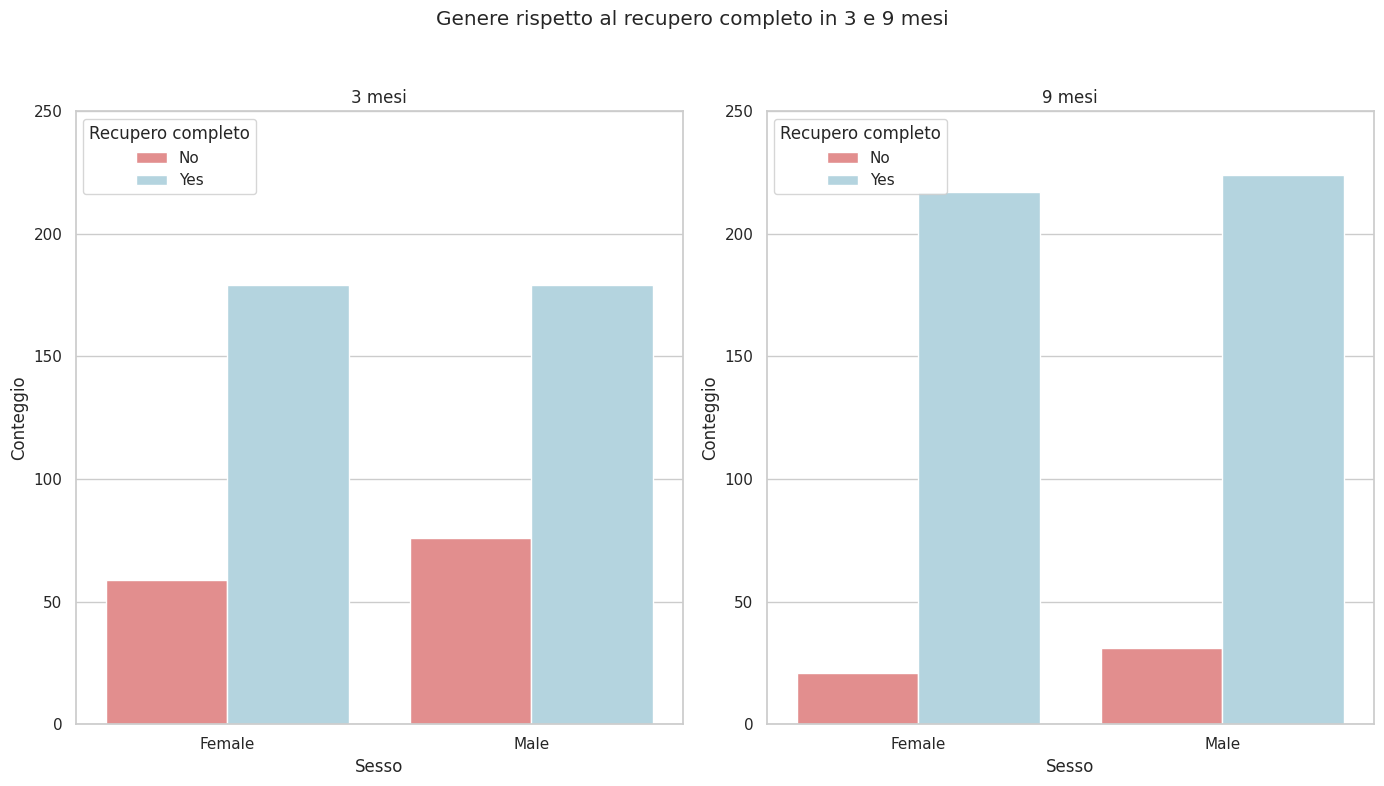

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data_3_months = data[['Sex', 'Full Recovery in 3 Months']].rename(columns={'Full Recovery in 3 Months': 'Full Recovery'}).copy()
data_3_months['Time Period'] = '3 Months'

data_9_months = data[['Sex', 'Full Recovery in 9 Months']].rename(columns={'Full Recovery in 9 Months': 'Full Recovery'}).copy()
data_9_months['Time Period'] = '9 Months'

combined_data = pd.concat([data_3_months, data_9_months], ignore_index=True)

combined_data['Full Recovery'] = combined_data['Full Recovery'].map({'No': 'No', 'Yes': 'Yes'})

colors = ['lightcoral', 'lightblue']

# Create the figure
plt.figure(figsize=(14, 8))

# Plot 3 months
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Sex', hue='Full Recovery', data=combined_data[combined_data['Time Period'] == '3 Months'], palette=colors)
plt.title('3 mesi')
plt.xlabel('Sesso')
plt.ylabel('Conteggio')
plt.legend(title='Recupero completo', loc='upper left')
ax1.set_ylim(0, 250)

# Plot 9 months
ax2 = plt.subplot(1, 2, 2)
sns.countplot(x='Sex', hue='Full Recovery', data=combined_data[combined_data['Time Period'] == '9 Months'], palette=colors)
plt.title('9 mesi')
plt.xlabel('Sesso')
plt.ylabel('Conteggio')
plt.legend(title='Recupero completo', loc='upper left')
ax2.set_ylim(0, 250)


plt.suptitle('Genere rispetto al recupero completo in 3 e 9 mesi')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



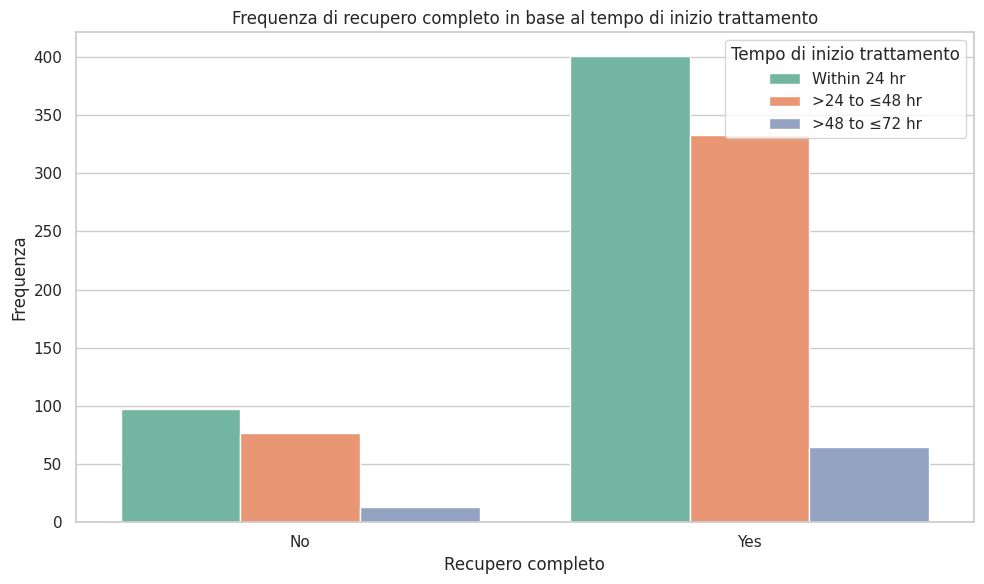

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Rename column for easier reference and remove 'Unknown' values
data = data.rename(columns={'Time between onset of symptoms and start of treatment': 'Time to Treatment'})
data = data[data['Time to Treatment'] != 'Unknown']

data['Full Recovery in 3 Months'] = data['Full Recovery in 3 Months'].map({'No': 'No', 'Yes': 'Yes'})
data['Full Recovery in 9 Months'] = data['Full Recovery in 9 Months'].map({'No': 'No', 'Yes': 'Yes'})

# Combine recovery data into a single DataFrame for plotting
data_3_months = data[['Time to Treatment', 'Full Recovery in 3 Months']].rename(columns={'Full Recovery in 3 Months': 'Full Recovery'}).copy()
data_3_months['Period'] = '3 Months'

data_9_months = data[['Time to Treatment', 'Full Recovery in 9 Months']].rename(columns={'Full Recovery in 9 Months': 'Full Recovery'}).copy()
data_9_months['Period'] = '9 Months'

data_combined = pd.concat([data_3_months, data_9_months], ignore_index=True)

time_categories = ['Within 24 hr', '>24 to ≤48 hr', '>48 to ≤72 hr']
data_combined = data_combined[data_combined['Time to Treatment'].isin(time_categories)]

plt.figure(figsize=(10, 6))
sns.countplot(x='Full Recovery', hue='Time to Treatment', data=data_combined, palette='Set2')

plt.title('Frequenza di recupero completo in base al tempo di inizio trattamento')
plt.xlabel('Recupero completo')
plt.ylabel('Frequenza')
plt.legend(title='Tempo di inizio trattamento', loc='upper right')

plt.tight_layout()
plt.show()


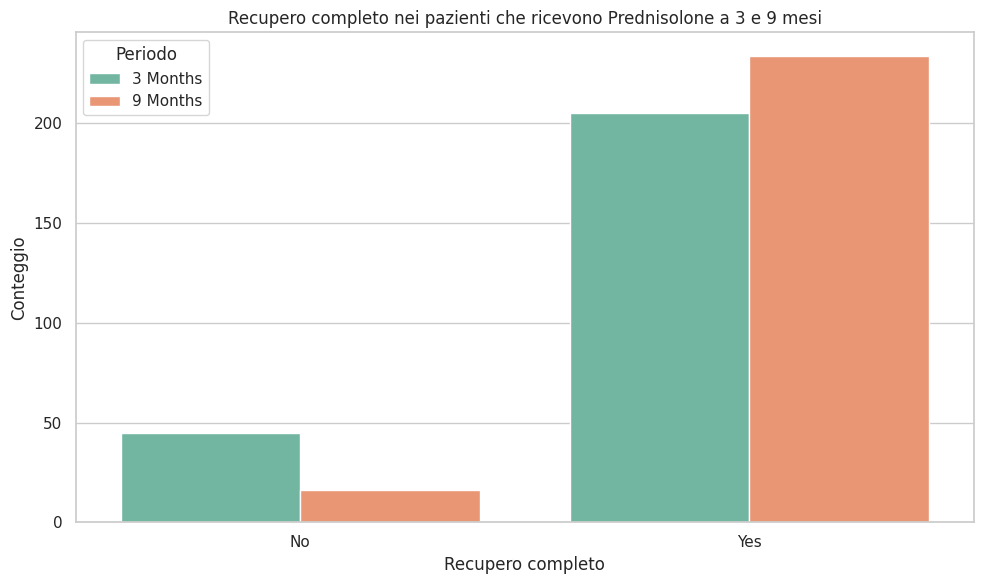

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data['Full Recovery in 3 Months'] = data['Full Recovery in 3 Months'].map({'No': 'No', 'Yes': 'Yes'})
data['Full Recovery in 9 Months'] = data['Full Recovery in 9 Months'].map({'No': 'No', 'Yes': 'Yes'})

# Filter data for patients who received Prednisolone
data_prednisolone = data[data['Received Prednisolone'] == 'Yes']

data_3_months = data_prednisolone[['Full Recovery in 3 Months']].rename(columns={'Full Recovery in 3 Months': 'Full Recovery'}).copy()
data_3_months['Time Period'] = '3 Months'

data_9_months = data_prednisolone[['Full Recovery in 9 Months']].rename(columns={'Full Recovery in 9 Months': 'Full Recovery'}).copy()
data_9_months['Time Period'] = '9 Months'

combined_data = pd.concat([data_3_months, data_9_months], ignore_index=True)

plt.figure(figsize=(10, 6))

sns.countplot(x='Full Recovery', hue='Time Period', data=combined_data, palette='Set2')


plt.title('Recupero completo nei pazienti che ricevono Prednisolone a 3 e 9 mesi')
plt.xlabel('Recupero completo')
plt.ylabel('Conteggio')
plt.legend(title='Periodo', loc='upper left')

plt.tight_layout()
plt.show()


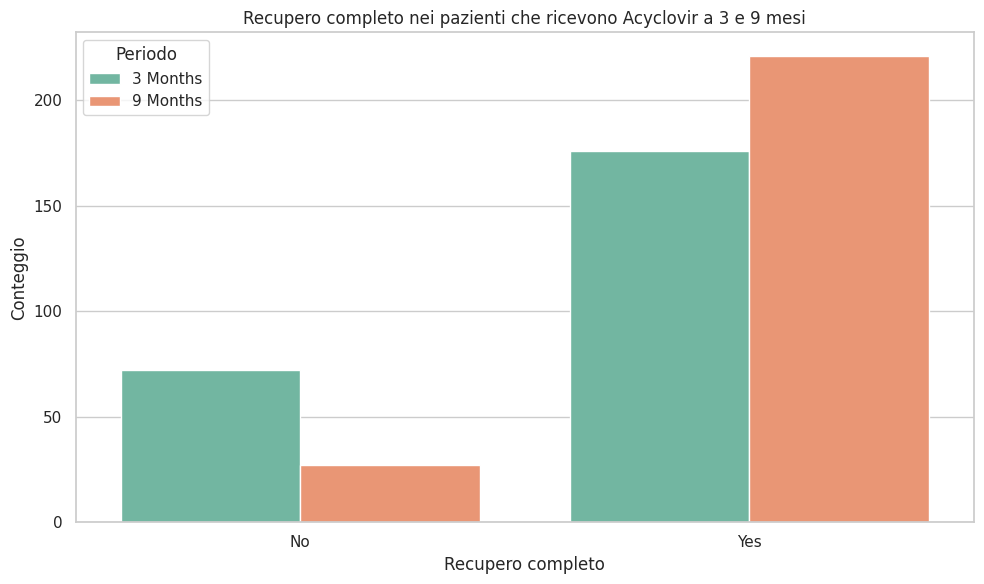

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data['Full Recovery in 3 Months'] = data['Full Recovery in 3 Months'].map({'No': 'No', 'Yes': 'Yes'})
data['Full Recovery in 9 Months'] = data['Full Recovery in 9 Months'].map({'No': 'No', 'Yes': 'Yes'})

# Filter data for patients who received acyclovir
data_acyclovir = data[data['Received Acyclovir'] == 'Yes']

data_3_months = data_acyclovir[['Full Recovery in 3 Months']].rename(columns={'Full Recovery in 3 Months': 'Full Recovery'}).copy()
data_3_months['Time Period'] = '3 Months'

data_9_months = data_acyclovir[['Full Recovery in 9 Months']].rename(columns={'Full Recovery in 9 Months': 'Full Recovery'}).copy()
data_9_months['Time Period'] = '9 Months'

combined_data = pd.concat([data_3_months, data_9_months], ignore_index=True)

plt.figure(figsize=(10, 6))


sns.countplot(x='Full Recovery', hue='Time Period', data=combined_data, palette='Set2')


plt.title('Recupero completo nei pazienti che ricevono Acyclovir a 3 e 9 mesi')
plt.xlabel('Recupero completo')
plt.ylabel('Conteggio')
plt.legend(title='Periodo', loc='upper left')

plt.tight_layout()
plt.show()

## Regressione ML

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Printing columns before preprocessing
print("Colonne prima del preprocessing:", data.columns)

# Rename the column for easier reference
data = data.rename(columns={'Time between onset of symptoms and start of treatment': 'Time to Treatment'})

# Encoding delle variabili categoriche
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Treatment Group'] = le.fit_transform(data['Treatment Group'])
data['Time to Treatment'] = le.fit_transform(data['Time to Treatment'])
data['Received Prednisolone'] = le.fit_transform(data['Received Prednisolone'])
data['Received Acyclovir'] = le.fit_transform(data['Received Acyclovir'])
data['Full Recovery in 3 Months'] = le.fit_transform(data['Full Recovery in 3 Months'])
data['Full Recovery in 9 Months'] = le.fit_transform(data['Full Recovery in 9 Months'])

# Printing columns after preprocessing
print("Colonne dopo il preprocessing:", data.columns)

# Displaying the first rows of the preprocessed dataframe
data.head()


Colonne prima del preprocessing: Index(['Patient ID', 'Sex', 'Age', 'Baseline Score on House–Brackmann scale',
       'Time to Treatment', 'Treatment Group', 'Received Prednisolone',
       'Received Acyclovir', '3-Month Score on House–Brackmann scale',
       'Full Recovery in 3 Months', '9-Month Score on House–Brackmann scale',
       'Full Recovery in 9 Months'],
      dtype='object')
Colonne dopo il preprocessing: Index(['Patient ID', 'Sex', 'Age', 'Baseline Score on House–Brackmann scale',
       'Time to Treatment', 'Treatment Group', 'Received Prednisolone',
       'Received Acyclovir', '3-Month Score on House–Brackmann scale',
       'Full Recovery in 3 Months', '9-Month Score on House–Brackmann scale',
       'Full Recovery in 9 Months'],
      dtype='object')


,Patient ID,Sex,Age,Baseline Score on House–Brackmann scale,Time to Treatment,Treatment Group,Received Prednisolone,Received Acyclovir,3-Month Score on House–Brackmann scale,Full Recovery in 3 Months,9-Month Score on House–Brackmann scale,Full Recovery in 9 Months
0,1,0,77,6,2,3,1,0,2,0,2,0
1,2,0,61,6,2,3,1,0,1,1,1,1
2,3,0,46,4,0,3,1,0,1,1,1,1
3,4,0,46,3,2,3,1,0,1,1,1,1
4,5,0,42,3,0,3,1,0,1,1,1,1


In [ ]:
from sklearn.model_selection import train_test_split

# Feature and target definition
X = data.drop(columns=['Full Recovery in 3 Months', 'Full Recovery in 9 Months', '9-Month Score on House–Brackmann scale'])
y = data['Full Recovery in 3 Months']

# Division of the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((394, 9), (99, 9))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definition of the model
model = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000)

# Parameter grid definition
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]
}

# Grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Migliori parametri:", best_params)

# Best average accuracy
best_score = grid_search.best_score_
print("Migliore accuratezza media:", best_score)

# Best model
best_model = grid_search.best_estimator_


Migliori parametri: {'C': 1, 'l1_ratio': 0.1}
Migliore accuratezza media: 0.7513145082765336


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score
# Prediction on the test set with the best model
y_pred = best_model.predict(X_test)

# Accuracy calculation
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)


Test Set Accuracy: 0.8585858585858586


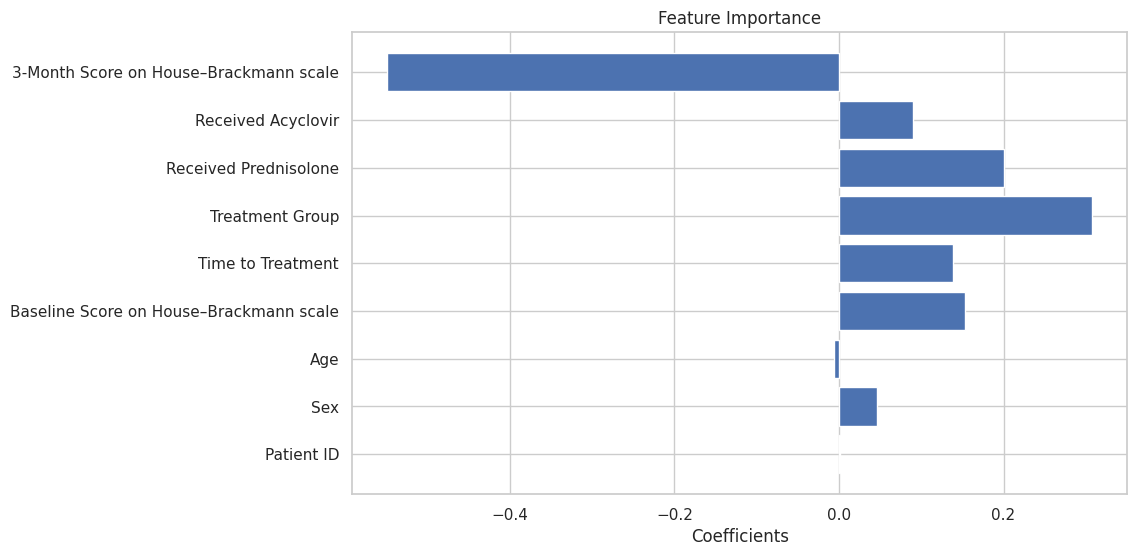

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extraction of coefficients
coefficients = best_model.coef_[0]
features = X.columns

# Plot creation
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.xlabel('Coefficients')
plt.title('Feature Importance')
plt.show()


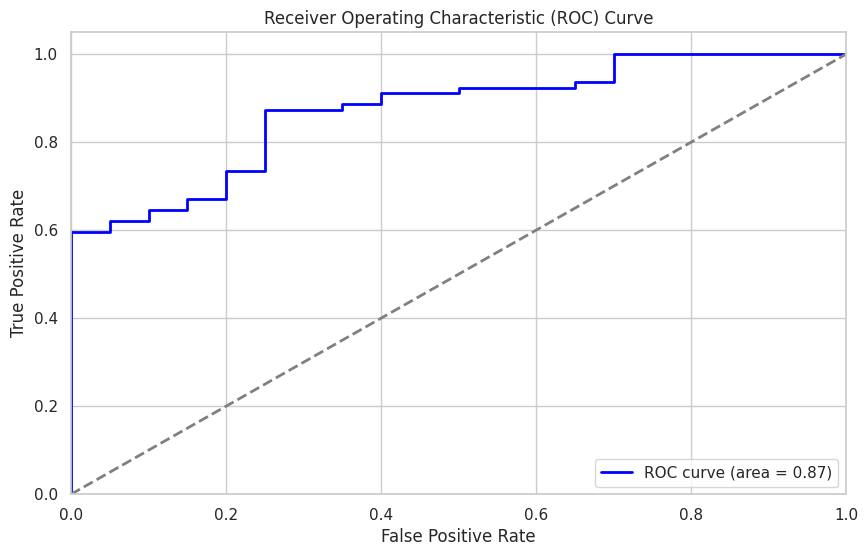

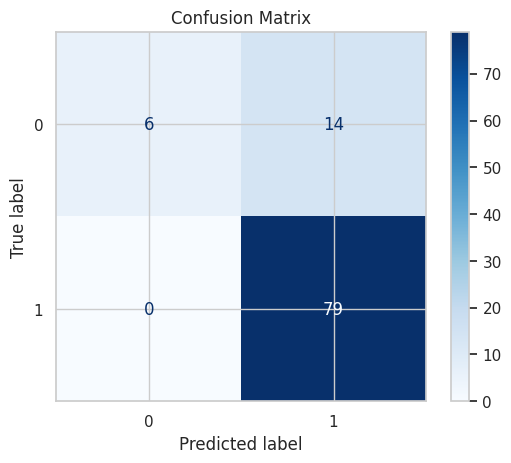

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Calculation of predicted probabilities
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculation of ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot of the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot of the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



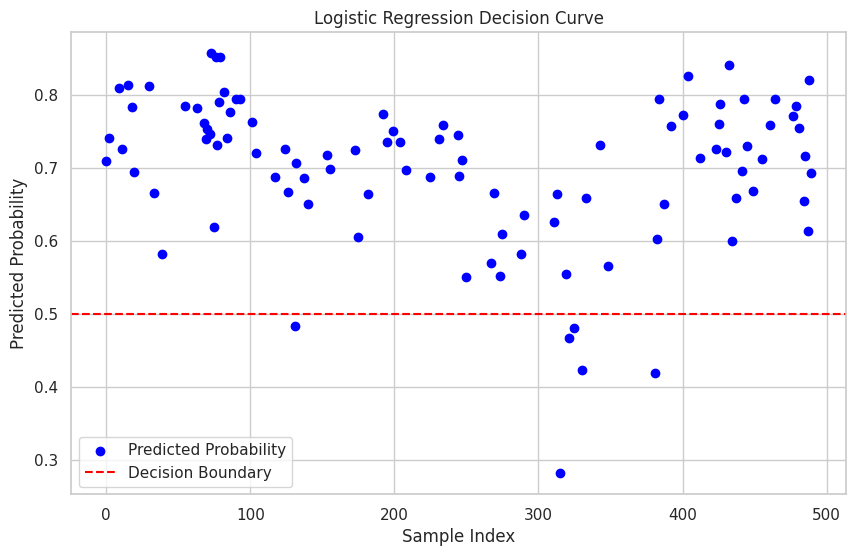

In [ ]:
# Creating the decision curve plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test.index, y_pred_prob, color='blue', label='Predicted Probability')
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Decision Curve')
plt.legend()
plt.show()


In [ ]:
print(data['Full Recovery in 3 Months'].value_counts())

Full Recovery in 3 Months
1    358
0    135
Name: count, dtype: int64


Logistic regression with Elastic Net produced significant results in the analysis of the Bell's palsy dataset. This method made it possible to identify and weight the most relevant variables, reducing the risk of overfitting by combining L1 and L2 penalties. In particular, the variable '3-Month Score on House-Brackmann scale' showed the greatest negative impact, indicating that higher scores on this scale are associated with a lower probability of complete recovery within 3 months. This result is clinically relevant because higher scores on the House-Brackmann scale represent more severe facial dysfunction.

Other notable variables include 'Treatment Group' and 'Received Prednisolone,' both of which have significant positive coefficients. This suggests that patients who receive Prednisolone and belong to certain treatment groups have a higher probability of complete recovery. Variables such as 'Baseline Score on House-Brackmann scale', 'Time to Treatment', and 'Received Acyclovir' also showed positive contributions, although less pronounced.

The confusion matrix revealed a considerable number of false positives, suggesting that the model tends to overestimate the probability of complete recovery. However, the absence of false negatives is a positive sign, indicating that the model is effective in correctly identifying cases of cure. The ROC curve with an area under the curve (AUC) of 0.88 confirms the model's good ability to discriminate between patients who will recover completely and those who will not within 3 months.

In [ ]:
from sklearn.model_selection import train_test_split

# Feature and target definition
X = data.drop(columns=['Full Recovery in 3 Months', 'Full Recovery in 9 Months'])
y = data['Full Recovery in 9 Months']

# Division of the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((394, 10), (99, 10))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definition of the model
model = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000)

# Parameter grid definition
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]
}

# Grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Migliori parametri:", best_params)

# Best average accuracy
best_score = grid_search.best_score_
print("Migliore accuratezza media:", best_score)

# Best model
best_model1 = grid_search.best_estimator_


Migliori parametri: {'C': 0.01, 'l1_ratio': 0.1}
Migliore accuratezza media: 0.8934112301200908


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score
# Prediction on the test set with the best model
y_pred = best_model1.predict(X_test)

# Accuracy calculation
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)


Test Set Accuracy: 0.898989898989899


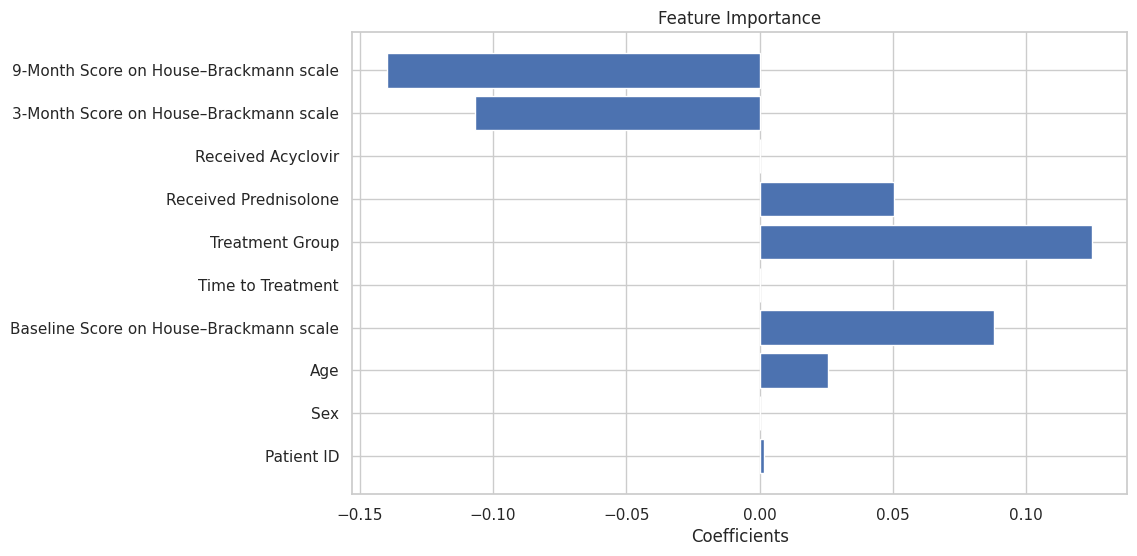

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extraction of coefficients
coefficients = best_model1.coef_[0]
features = X.columns

# Plot creation
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.xlabel('Coefficients')
plt.title('Feature Importance')
plt.show()

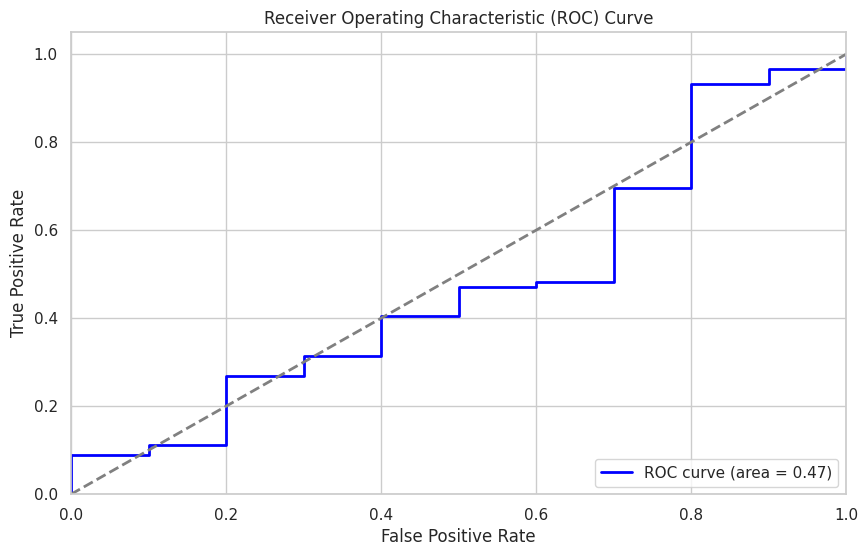

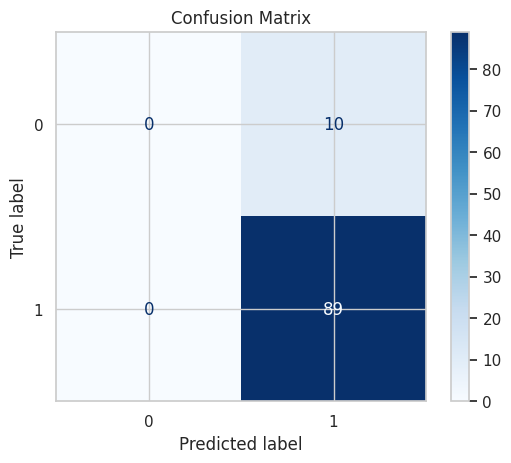

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Calculation of predicted probabilities
y_pred_prob = best_model1.predict_proba(X_test)[:, 1]

# Calculation of ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot of the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot of the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


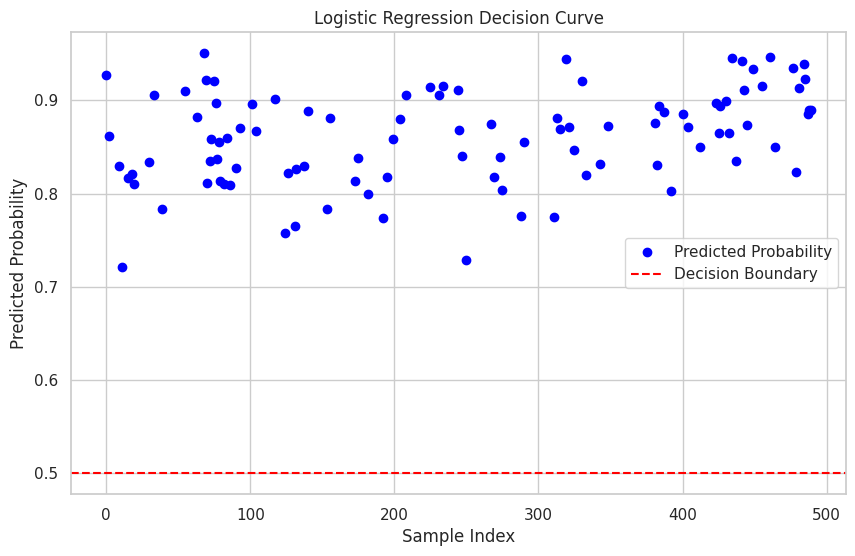

In [ ]:
# Creating the decision curve plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test.index, y_pred_prob, color='blue', label='Predicted Probability')
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Decision Curve')
plt.legend()
plt.show()

In [ ]:
print(data['Full Recovery in 9 Months'].value_counts())


Full Recovery in 9 Months
1    441
0     52
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Application of SMOTE to the training dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Balance verification after SMOTE
print(y_resampled.value_counts())


Full Recovery in 9 Months
1    352
0    352
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Migliori parametri: {'C': 0.01, 'l1_ratio': 0.1}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test Set Accuracy after SMOTE: 0.898989898989899
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        10
           1       0.95      0.93      0.94        89

    accuracy                           0.90        99
   macro avg       0.73      0.77      0.74        99
weighted avg       0.91      0.90      0.90        99



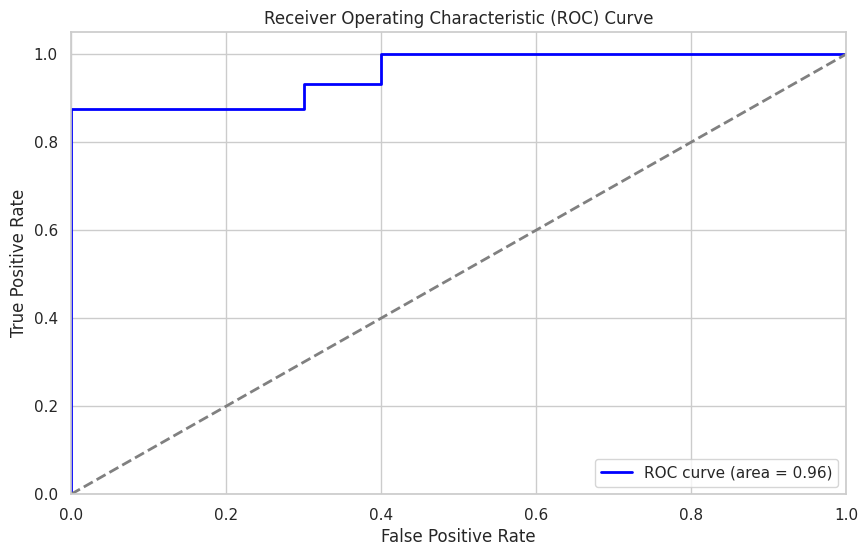

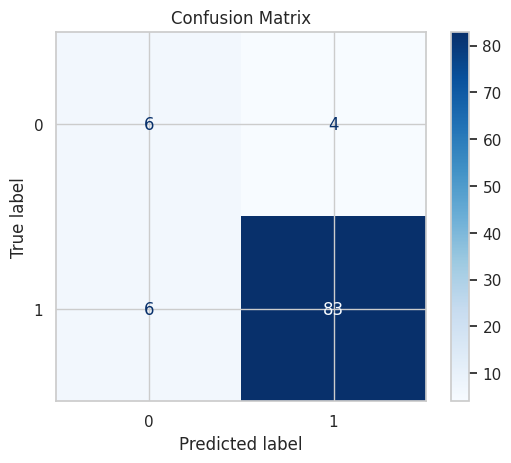

In [ ]:
# Definition of the model
model = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000)

# Definizione della griglia dei parametri
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]
}

# Grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Migliori parametri:", best_params)

# Best model
best_model2 = grid_search.best_estimator_

# Application of SMOTE to the training dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Training the Logistic Regression model on the balanced dataset
best_model.fit(X_resampled, y_resampled)

# Prediction on test set
y_pred = best_model.predict(X_test)

# Accuracy calculation
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy after SMOTE:", accuracy)

# Generating the classification report
print(classification_report(y_test, y_pred))

# Calculation of predicted probabilities
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculation of ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot of the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot of the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

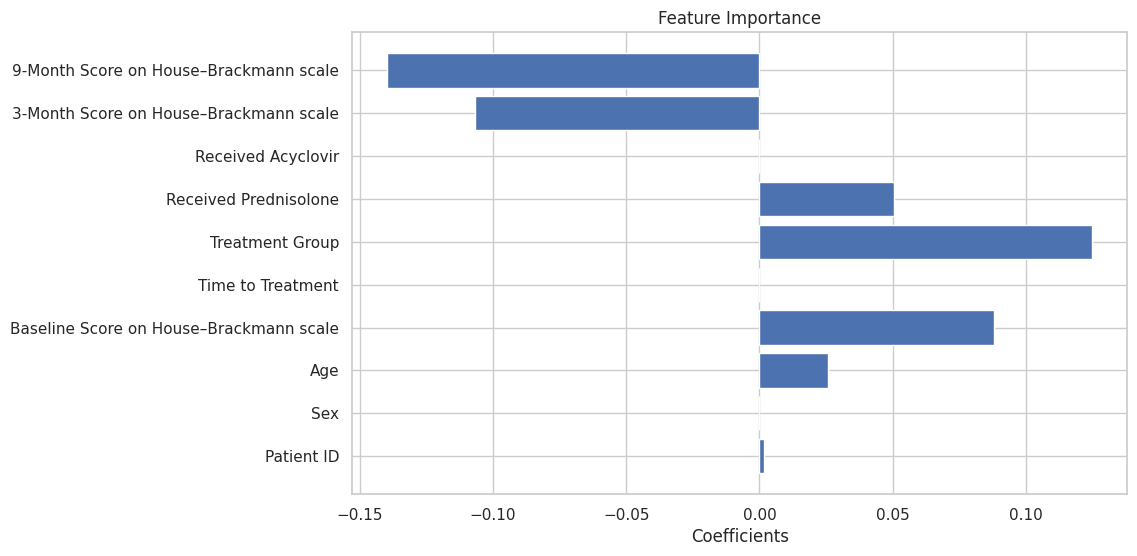

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extraction of coefficients
coefficients = best_model2.coef_[0]
features = X.columns

# Plot creation
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.xlabel('Coefficients')
plt.title('Feature Importance')
plt.show()

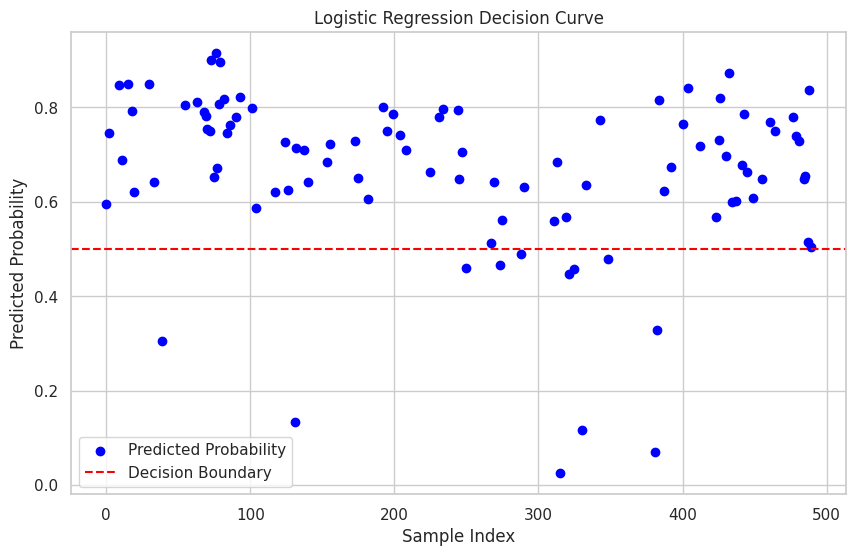

In [ ]:
# Creating the decision curve plot1
plt.figure(figsize=(10, 6))
plt.scatter(X_test.index, y_pred_prob, color='blue', label='Predicted Probability')
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Decision Curve')
plt.legend()
plt.show()


SMOTE (Synthetic Minority Over-sampling Technique) balances the dataset by generating synthetic data for the minority class. This process creates new examples not by simply duplicating existing data, but by interpolating among the minority class examples.

How SMOTE works:

- For each minority class example, SMOTE randomly selects one of its k-nearest neighbors.
- It creates a new synthetic instance by interpolating between the current instance and the selected neighbor. The new instance is randomly generated along the line connecting the two examples.

## Survival Analysis

In [ ]:
print(data['Full Recovery in 9 Months'].value_counts())

Full Recovery in 9 Months
1    441
0     52
Name: count, dtype: int64


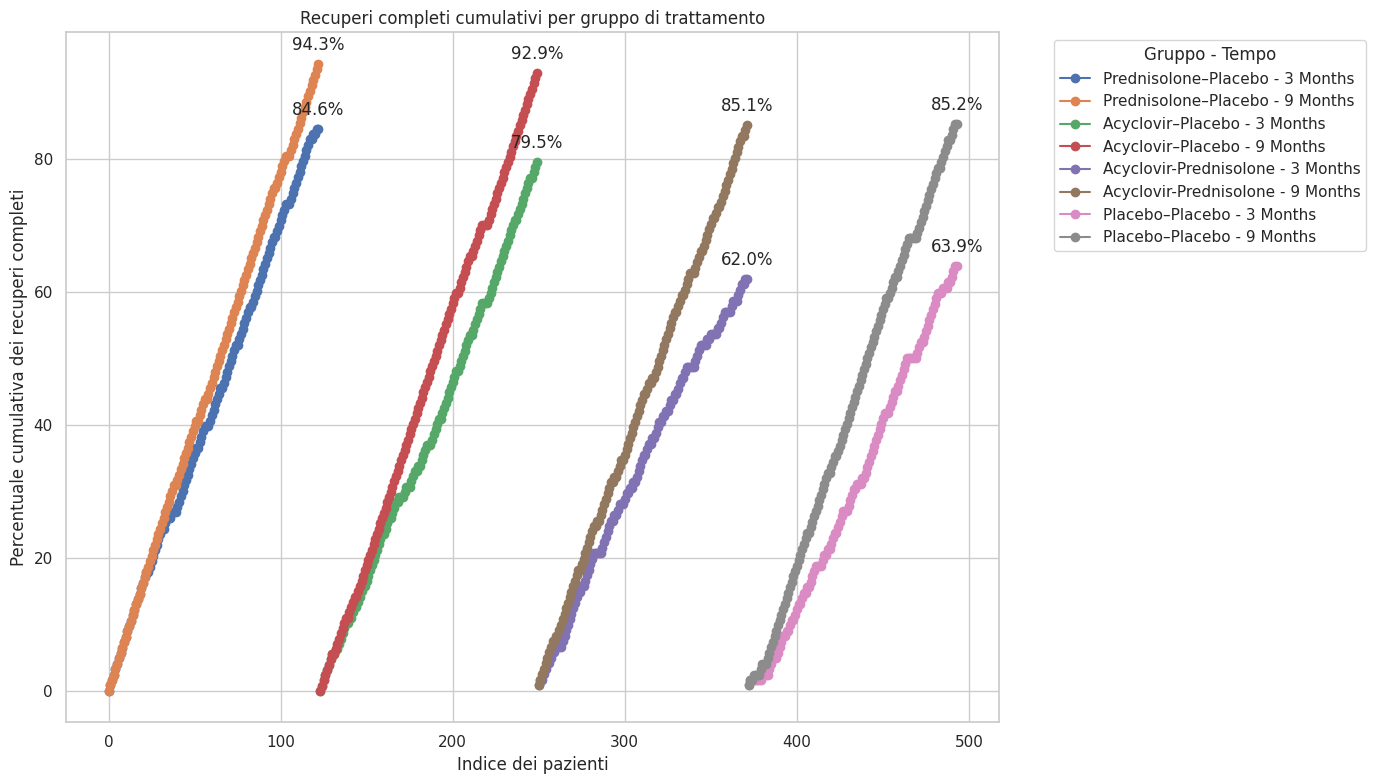

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Correcting column names to eliminate spaces
data.columns = [col.strip() for col in data.columns]

# Mapping treatment groups into names
treatment_mapping = {
    3: 'Prednisolone–Placebo',
    1: 'Acyclovir–Placebo',
    0: 'Acyclovir-Prednisolone',
    2: 'Placebo–Placebo'
}
data['treatment_group'] = data['Treatment Group'].map(treatment_mapping)

# Convert recovery columns to numeric
data['Full Recovery in 3 Months'] = pd.to_numeric(data['Full Recovery in 3 Months'], errors='coerce')
data['Full Recovery in 9 Months'] = pd.to_numeric(data['Full Recovery in 9 Months'], errors='coerce')

# Total patient count by group
total_patients = data.groupby('treatment_group').size()

# Calculation of cumulative success rate at 3 months and 9 months
data['cumulative_3_months'] = data.groupby('treatment_group')['Full Recovery in 3 Months'].cumsum()
data['cumulative_9_months'] = data.groupby('treatment_group')['Full Recovery in 9 Months'].cumsum()

# Normalization of cumulative rates for each treatment group
data['cumulative_3_months'] = data['cumulative_3_months'] / data['treatment_group'].map(total_patients) * 100
data['cumulative_9_months'] = data['cumulative_9_months'] / data['treatment_group'].map(total_patients) * 100

# Plot creation
fig, ax = plt.subplots(figsize=(14, 8))

for group in treatment_mapping.values():
    group_data = data[data['treatment_group'] == group]
    ax.plot(group_data['cumulative_3_months'], label=f'{group} - 3 Months', marker='o')
    ax.plot(group_data['cumulative_9_months'], label=f'{group} - 9 Months', marker='o')

# Annotations
for group in treatment_mapping.values():
    last_idx_3_months = data[data['treatment_group'] == group]['cumulative_3_months'].last_valid_index()
    last_value_3_months = data.loc[last_idx_3_months, 'cumulative_3_months']
    ax.annotate(f'{last_value_3_months:.1f}%', (last_idx_3_months, last_value_3_months), textcoords="offset points", xytext=(0,10), ha='center')

    last_idx_9_months = data[data['treatment_group'] == group]['cumulative_9_months'].last_valid_index()
    last_value_9_months = data.loc[last_idx_9_months, 'cumulative_9_months']
    ax.annotate(f'{last_value_9_months:.1f}%', (last_idx_9_months, last_value_9_months), textcoords="offset points", xytext=(0,10), ha='center')

ax.set_title('Recuperi completi cumulativi per gruppo di trattamento')
ax.set_xlabel('Indice dei pazienti')
ax.set_ylabel('Percentuale cumulativa dei recuperi completi')
ax.grid(True)

# Placing the legend outside the chart
ax.legend(title='Gruppo - Tempo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Layout adjustment to avoid overlaps
plt.tight_layout()

# Plot display
plt.show()

